In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout
from keras.optimizers import Adam
import numba as nb

In [6]:
@nb.njit()
def a(theta):
    return -np.sin(theta)

@nb.njit()
def verlet(x0,v0,a,N,T):
    xs=[x0]
    vs=[v0]
    x=x0 
    v=v0
    h= T/N
    for i in range(N):
        v+= h*a(x)/2
        x+= h*v
        v+= h*a(x)/2

        xs.append(x)
        vs.append(v)

    return(np.array(xs),np.array(vs))

@nb.njit()
def get_samples(x0,v0,a,N,T):
    xs,vs= verlet(x0,v0,a,N,T)
    X= np.column_stack((xs[1:],xs[:-1]))
    Y= np.where((np.abs(xs[1:])-np.abs(xs[:-1]))>0,0,1)
    return X,Y


In [7]:
x0=np.pi/4
v0=0
h= 0.1
N=1000
T= h*N
ts= np.linspace(0,T,N+1)

In [8]:
xs,vs= verlet(x0,v0,a,N,T)

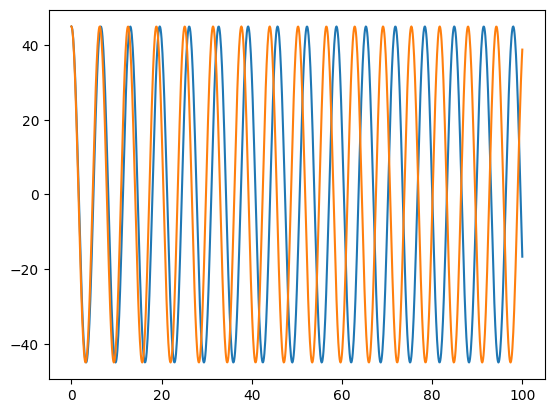

In [9]:
plt.plot(ts,np.rad2deg(xs))
plt.plot(ts,np.rad2deg(x0*np.cos(ts)))

In [286]:
X= np.column_stack((xs[1:],xs[:-1]))
Y= np.where((np.abs(xs[1:])-np.abs(xs[:-1]))>0,0,1)

In [293]:
nn= Sequential([Input((2,)),
               Dense(8,activation='relu'),
               #Dropout(0.3),
               #Dense(8,activation='relu'),
               Dense(1,activation='sigmoid')])

nn.compile(loss='binary_crossentropy',optimizer=Adam(0.05),metrics=['accuracy'])


In [300]:
nn.fit(X,Y,batch_size=100,epochs=80,validation_split=0.2)

Epoch 1/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9837 - loss: 0.0916 - val_accuracy: 0.9700 - val_loss: 0.0950
Epoch 2/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9831 - loss: 0.0914 - val_accuracy: 0.9800 - val_loss: 0.0924
Epoch 3/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9899 - loss: 0.0883 - val_accuracy: 0.9900 - val_loss: 0.0911
Epoch 4/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9900 - loss: 0.0877 - val_accuracy: 0.9800 - val_loss: 0.0900
Epoch 5/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9832 - loss: 0.0848 - val_accuracy: 0.9800 - val_loss: 0.0923
Epoch 6/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9824 - loss: 0.0934 - val_accuracy: 0.9900 - val_loss: 0.0896
Epoch 7/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9813 - loss: 0.0864 - val_accuracy: 0.9500 - val_loss: 0.1111
Epoch 8/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9594 - loss: 0.1123 - val_accuracy: 0.9550 - val_loss: 0.1240


In [296]:
X_test,Y_test= get_samples(np.pi/2,0,a,N,T)
nn.evaluate(X_test,Y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9348 - loss: 0.1223


[0.10958497226238251, 0.9419999718666077]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


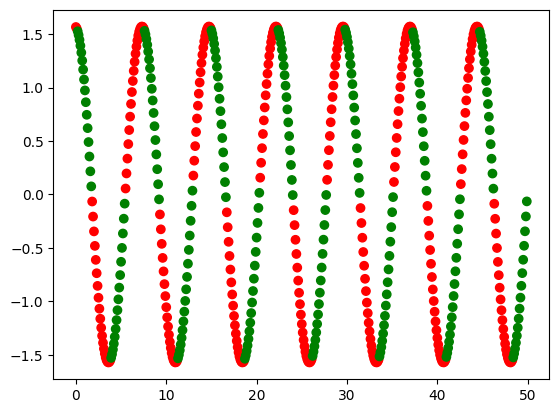

In [297]:
colors= ListedColormap(['red','green'])
c= np.where(nn.predict(X_test).reshape(-1)>0.5,1,0)
plt.scatter(ts[:500],X_test[:500,0],c=c[:500],cmap=colors)

In [298]:
xs= np.linspace(-np.pi/2,np.pi/2,100)
ys= np.linspace(-np.pi/2,np.pi/2,100)

x_mesh,y_mesh= np.meshgrid(xs,ys)
space= np.column_stack((np.ravel(x_mesh),np.ravel(y_mesh)))
Ys= nn.predict(space).reshape(-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


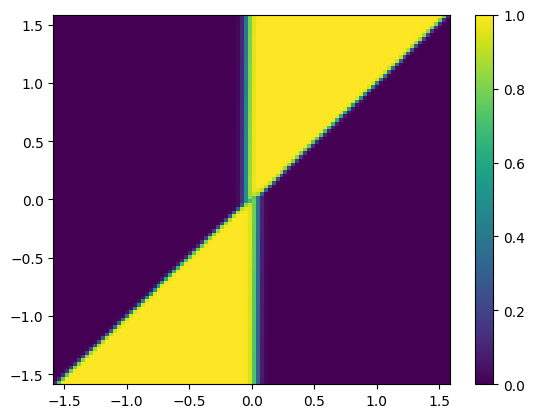

In [299]:
plt.pcolormesh(x_mesh,y_mesh,Ys.reshape(x_mesh.shape))
plt.colorbar()